# Integrating Embeddings with Queries in an Information Retrieval System

## Objective

In this exercise, we will learn how to integrate embeddings with a query to enhance an Information Retrieval (IR) system. We will use both static and contextual embeddings to generate representations of queries and documents, compute their similarities, and rank the documents based on relevance to the query.

---

## Stages Covered

1. **Introduction to Pre-trained Transformer Models**
   - Load and use BERT for contextual embeddings.
   - Load and use Word2Vec for static embeddings.

2. **Generating Text Embeddings**
   - Generate embeddings for queries and documents using BERT.
   - Generate embeddings for queries and documents using Word2Vec.

3. **Computing Similarity Between Embeddings**
   - Compute cosine similarity between query and document embeddings.
   - Rank documents based on similarity scores.

4. **Integrating Embeddings with Queries**
   - Practical implementation of embedding-based retrieval for a given text corpus.

---

## Prerequisites

- TensorFlow
- Hugging Face's Transformers library
- Gensim library
- Scikit-learn library
- A text corpus in the `../data` folder

---

## Exercise

Follow the steps below to integrate embeddings with a query and enhance your IR system.



Step 0: Verify requirements:

* tensorflow
* transformers
* scikit-learn
* matplotlib
* seaborn

Step 1: Download dataset from Kaggle

URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

In [1]:
import pandas as pd

wine_df = pd.read_csv('../WEEK 10/wine-reviews/winemag-data_first150k.csv')
print(wine_df.head())
corpus = wine_df['description']

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Step 2: Load a Pre-trained Transformer Model

Use the BERT model for generating contextual embeddings and Word2Vec for static embeddings.

In [2]:
import tensorflow as tf
import gensim.downloader as api
from transformers import BertTokenizer, TFBertModel

# Load pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

c:\Users\Karen\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertF

Step 3: Generate Text Embeddings

Static Embeddings with Word2Vec

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Instancias para stopwords y lematización
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:
import re
# Función de preprocesamiento mejorada
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords y lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

In [7]:
# Aplicar preprocesamiento
preprocessed_corpus = corpus.apply(preprocess_text)

In [8]:
import numpy as np

# Función para generar embeddings con Word2Vec
def generate_word2vec_embeddings(texts):
    embeddings = []
    for tokens in texts:
        word_vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return np.array(embeddings)

# Generar embeddings con Word2Vec para las primeras 10 descripciones
word2vec_embeddings = generate_word2vec_embeddings(preprocessed_corpus[:10])
print("Word2Vec Embeddings:", word2vec_embeddings)
print("Word2Vec Shape:", word2vec_embeddings.shape)

Word2Vec Embeddings: [[ 0.03311943  0.01237039 -0.03318428 ... -0.02336662  0.07807115
   0.03150132]
 [-0.0105367   0.00522868 -0.03369014 ... -0.05033823  0.0410731
   0.04363607]
 [-0.0646878   0.03206661  0.01900679 ... -0.03738719  0.10073234
   0.05724045]
 ...
 [ 0.01216295  0.02747917 -0.02625762 ... -0.06548139  0.10872947
   0.04503632]
 [ 0.01986755  0.00644653 -0.05017578 ... -0.0148645   0.11241699
   0.02735718]
 [ 0.01602567  0.03393727 -0.01829824 ... -0.10325143  0.07628312
   0.07658952]]
Word2Vec Shape: (10, 300)


Contextual Embeddings with BERT

In [9]:
#Este código no modifique
def generate_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :])  # Use [CLS] token representation
    return np.array(embeddings).transpose(0,2,1)

bert_embeddings = generate_bert_embeddings(corpus[:10])
print("BERT Embeddings:", bert_embeddings)
print("Word2Vec Shape:", bert_embeddings.shape)

BERT Embeddings: [[[ 0.1196747 ]
  [-0.4885676 ]
  [ 0.3645307 ]
  ...
  [-0.43680456]
  [ 0.11976105]
  [ 0.18947834]]

 [[-0.05186595]
  [-0.3650654 ]
  [ 0.64746   ]
  ...
  [-0.31474504]
  [ 0.05560068]
  [ 0.51543313]]

 [[-0.731732  ]
  [ 0.35088503]
  [-0.01913851]
  ...
  [-0.03388346]
  [ 0.22656582]
  [ 0.3079811 ]]

 ...

 [[-0.35893512]
  [-0.5862952 ]
  [ 0.41342127]
  ...
  [-0.16299513]
  [ 0.3321336 ]
  [ 0.49520707]]

 [[-0.06120765]
  [-0.3186191 ]
  [ 0.6636807 ]
  ...
  [-0.26011437]
  [ 0.22982608]
  [ 0.49291295]]

 [[-0.79110825]
  [-0.31794325]
  [ 0.24998964]
  ...
  [-0.42931482]
  [ 0.30838794]
  [-0.0667865 ]]]
Word2Vec Shape: (10, 768, 1)


Step 4: Compute Similarity Between Embeddings

Use the scikit-learn library.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between Word2Vec embeddings
word2vec_similarity = cosine_similarity(word2vec_embeddings)
print("Word2Vec Cosine Similarity:\n", word2vec_similarity)

# Cosine similarity between BERT embeddings
bert_similarity = cosine_similarity(bert_embeddings.reshape(10,768))
print("BERT Cosine Similarity:\n", bert_similarity)

Word2Vec Cosine Similarity:
 [[1.0000004  0.8483963  0.78583765 0.861869   0.75254273 0.8593351
  0.8609755  0.8614833  0.8476743  0.83399975]
 [0.8483963  0.99999994 0.84296054 0.8755747  0.6813631  0.9059633
  0.8560818  0.92526186 0.79257053 0.85104096]
 [0.78583765 0.84296054 0.9999997  0.8394819  0.70447695 0.82597035
  0.7952835  0.8477056  0.76173866 0.8541464 ]
 [0.861869   0.8755747  0.8394819  0.9999998  0.7612557  0.8938133
  0.87136257 0.8898434  0.83739537 0.85371184]
 [0.75254273 0.6813631  0.70447695 0.7612557  1.0000001  0.715102
  0.70166284 0.7143747  0.84955066 0.77540326]
 [0.8593351  0.9059633  0.82597035 0.8938133  0.715102   1.
  0.8653967  0.91606027 0.82144976 0.8254906 ]
 [0.8609755  0.8560818  0.7952835  0.87136257 0.70166284 0.8653967
  0.99999994 0.871059   0.80096734 0.8230201 ]
 [0.8614833  0.92526186 0.8477056  0.8898434  0.7143747  0.91606027
  0.871059   0.9999998  0.8277704  0.879182  ]
 [0.8476743  0.79257053 0.76173866 0.83739537 0.84955066 0.821449

Step 5: Compare Contextual and Static Embeddings

Analyze and compare the similarity results from both BERT and Word2Vec embeddings.

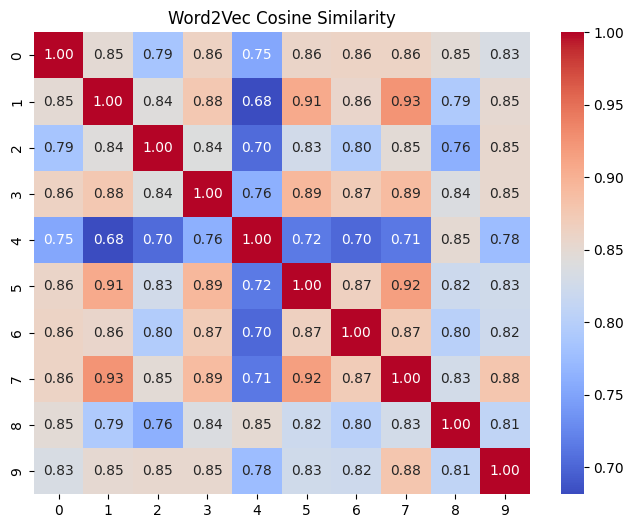

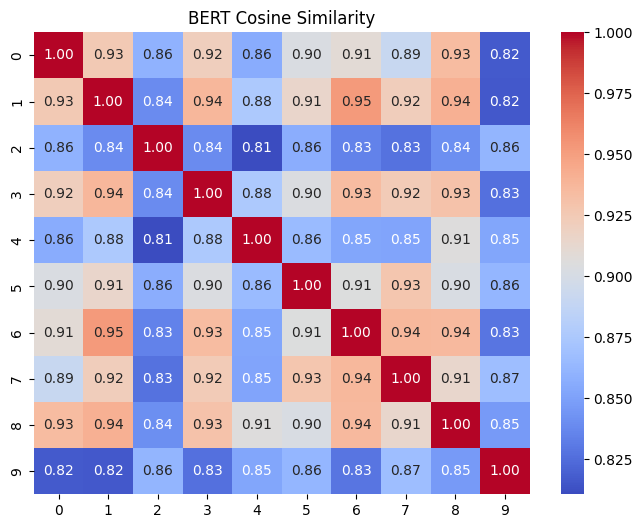

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(matrix, title, figsize=(8, 6), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_similarity_matrix(word2vec_similarity, "Word2Vec Cosine Similarity")
plot_similarity_matrix(bert_similarity, "BERT Cosine Similarity")

Step 6: Applying to Corpus

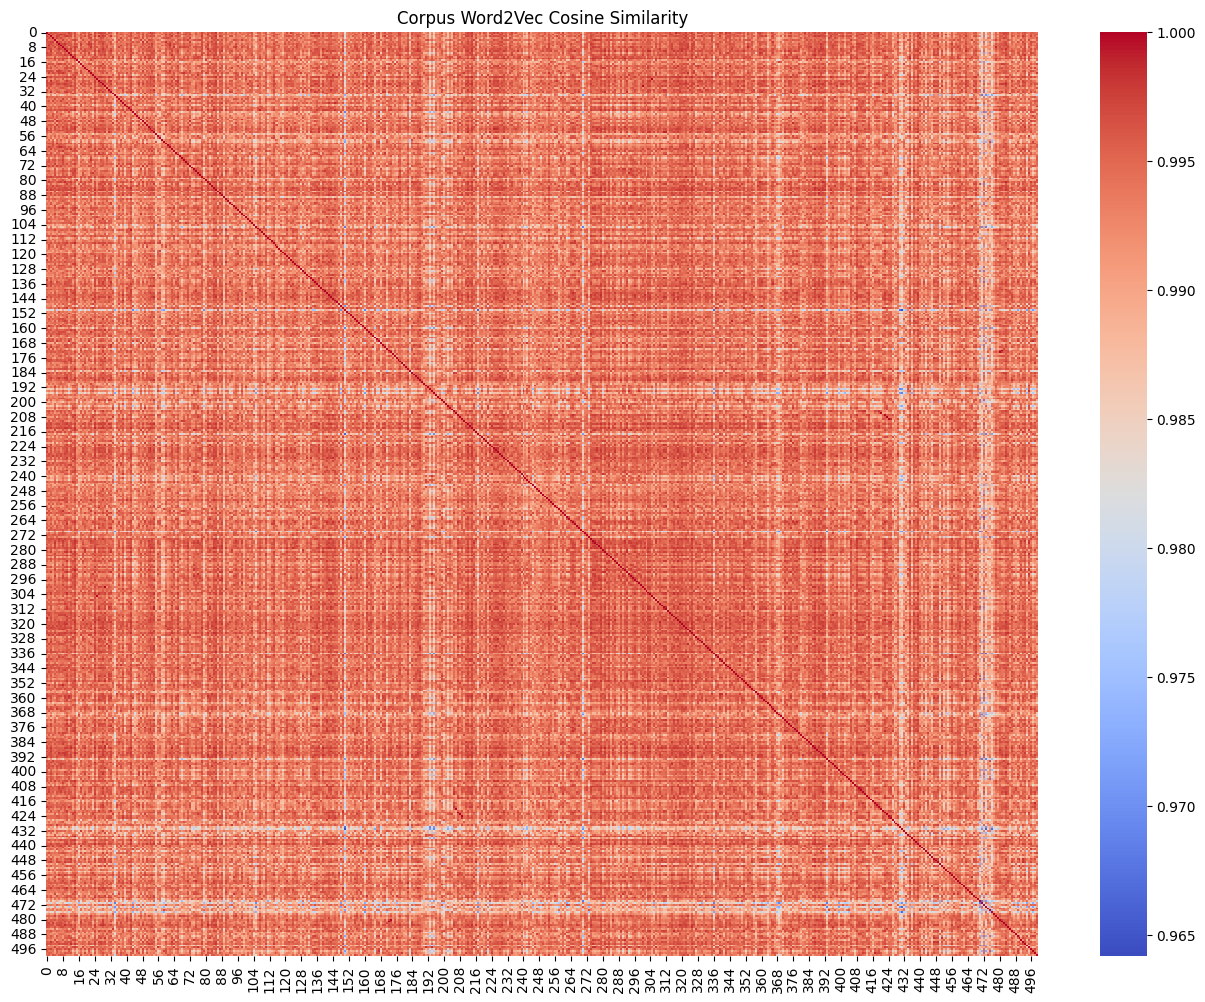

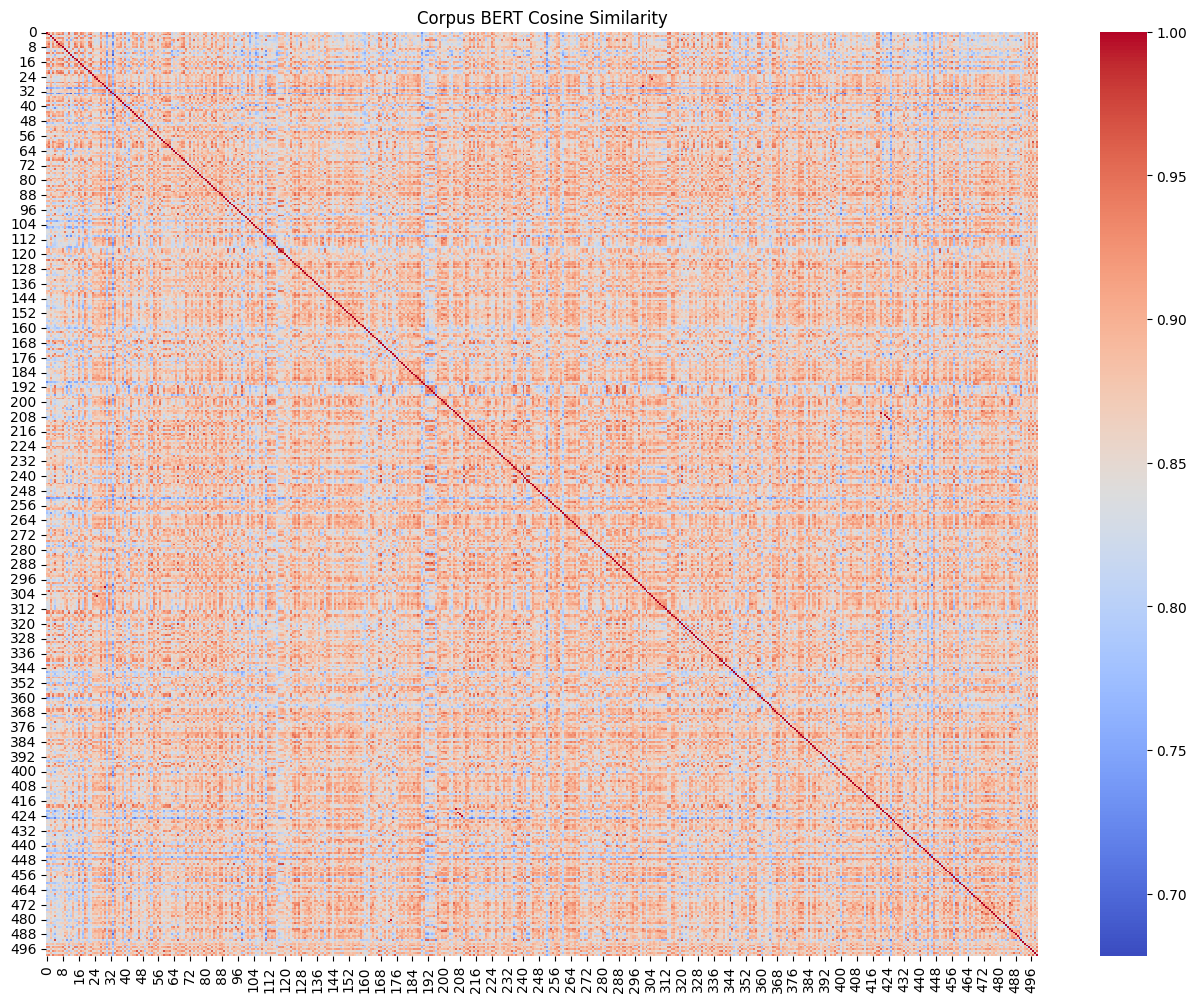

In [12]:
# Generate embeddings for the corpus
corpus_word2vec_embeddings = generate_word2vec_embeddings(corpus[:500])
corpus_bert_embeddings = generate_bert_embeddings(corpus[:500])

# Compute similarity for the corpus
corpus_word2vec_similarity = cosine_similarity(corpus_word2vec_embeddings)
corpus_bert_similarity = cosine_similarity(corpus_bert_embeddings.reshape(corpus_bert_embeddings.shape[:2]))

# Plot similarity matrices
plot_similarity_matrix(corpus_word2vec_similarity, "Corpus Word2Vec Cosine Similarity", figsize=(16, 12), annotation=False)
plot_similarity_matrix(corpus_bert_similarity, "Corpus BERT Cosine Similarity", figsize=(16, 12), annotation=False)

Summary

So far, in this exercise, you learned how to:

* Load a pre-trained transformer model (BERT) and a static embedding model (Word2Vec).
* Generate text embeddings using these models.
* Compute cosine similarity between embeddings.
* Compare the similarity results from both contextual and static embeddings.

Now you have a practical understanding of how transformers and embeddings can be used in Information Retrieval systems.

Let's integrate query search.

Step 7: Generate Embeddings for the Query

Generate embeddings for the query using the same model used for the documents.

In [23]:
query = "chocolate and vanilla"

# Preprocesar la consulta
preprocessed_query = preprocess_text(query)

# Función para generar embeddings con Word2Vec para la consulta
def generate_word2vec_query_embedding(query_tokens):
    word_vectors = [word2vec_model[word] for word in query_tokens if word in word2vec_model]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Generar embedding de Word2Vec para la consulta
word2vec_query_embedding = generate_word2vec_query_embedding(preprocessed_query)

# Función para generar embedding con BERT para la consulta
def generate_bert_query_embedding(query):
    inputs = tokenizer(query, return_tensors='tf', padding=True, truncation=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()  # Use [CLS] token representation

# Generar embedding de BERT para la consulta
bert_query_embedding = generate_bert_query_embedding(query)


Step 8: Compute Similarity Between Query and Documents

Compute the similarity between the query embedding and each document embedding.

In [24]:
# Calcular similitud de coseno entre la consulta y las descripciones del corpus
def compute_cosine_similarity(query_embedding, corpus_embeddings):
    return cosine_similarity([query_embedding], corpus_embeddings).flatten()

# Similaridad de coseno con Word2Vec
word2vec_similarities = compute_cosine_similarity(word2vec_query_embedding, word2vec_embeddings)

# Similaridad de coseno con BERT
bert_similarities = compute_cosine_similarity(bert_query_embedding, bert_embeddings.reshape(10, 768))

Step 9: Retrieve and Rank Documents Based on Similarity Scores

Retrieve and rank the documents based on their similarity scores to the query.

In [25]:
# Mostrar las descripciones más similares
def display_top_similar_descriptions(similarities, top_n=5):
    top_indices = similarities.argsort()[-top_n:][::-1]
    for idx in top_indices:
        print(f"Description: {corpus[idx]}\nSimilarity: {similarities[idx]:.4f}\n")

print("Top similar descriptions using Word2Vec:")
display_top_similar_descriptions(word2vec_similarities)

print("Top similar descriptions using BERT:")
display_top_similar_descriptions(bert_similarities)

Top similar descriptions using Word2Vec:
Description: Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.
Similarity: 0.7446

Description: Lush cedary black-fruit aromas are luxe and offer notes of marzipan and vanilla. This bruiser is massive and tannic on the palate, but still lush and friendly. Chocolate is a key flavor, while baked berry and cassis flavors are hardly wallflowers. On the finish, this is tannic and deep as a sea trench. Drink this saturated black-colored Toro through 2023.
Similarity: 0.7136

Description: Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and oran